# Analysing the Earnings and Women Participation in Recent Graduates 

In this project, we'll work with a dataset contanaing data on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repository](https://github.com/fivethirtyeight/data/tree/master/college-majors). These are the colums in the dataset:


* Rank - Rank by median earnings
* Major_code - Major code, FO1DP in ACS PUMS
* Major - Major description
* Major_category - Category of major from Carnevale et al
* Total - Total number of people with major
* Sample_size - Sample size (unweighted) of full-time, year-round ONLY (used for earnings)
* Men - Male graduates
* Women - Female graduates
* ShareWomen - Women as share of total
* Employed - Number employed (ESR == 1 or 2)
* Full_time - Employed 35 hours or more
* Part_time - Employed less than 35 hours
* Full_time_year_round - Employed at least 50 weeks (WKW == 1) and at least 35 hours (WKHP >= 35)
* Unemployed - Number unemployed (ESR == 3)
* Unemployment_rate - Unemployed / (Unemployed + Employed)
* Median - Median earnings of full-time, year-round workers
* P25th - 25th percentile of earnigns
* P75th - 75th percentile of earnings
* College_jobs - Number with job requiring a college degree
* Non_college_jobs - Number with job not requiring a college degree
* Low_wage_jobs - Number in low-wage service jobs

Notice thar the data is sorted by the first column, rank, which reflects the median earning for each major. So, we can say that the dataset is ordered by the median salary.

The main goal of this project is to, using only data visualization, answer some questions, such as, if students in more popular majors make more money, or students that majored in subjects that were majority female make more money.

**Disclaimer: This is guided project from the DataQuest's "Exploratory Data Visualization" course developed by learning purposes. Although it may look like other projects made for the same reason, this project has some features of its own that were implemented by me. Every line in this project was though of and typed by me.**

### Data Exploration
Let's first import the libraries we'll use. Then we'll read the file into a DataFrame and display its first row.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

Petroleum Engineering is the major with the highest median earnings.

Let's take a look in the top five.

In [2]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


We can that all the five majors with highest earnings belong to the category Engineering.

Now let's see more details on the data.

In [3]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


We can see, for example, that the average median salary for all the majors is $40,000, while the average unemployment rate is about 0,07. The average share of women in the majors is around 52%.

Moving on, before we start with the charts, let's first delete any rows that contains null data.

In [4]:
raw_data_count = recent_grads.shape[0]
recent_grads = recent_grads.dropna()
cleaned_data_count = recent_grads.shape[0]
print(raw_data_count)
print(cleaned_data_count)

173
172


One row was deleted.

### Data Visualization

We'll start by analysing, through bar charts, the unemployment rate in the top ten highest and lowest median salaries . Keep in my that the dataset is ordered by the median salary.

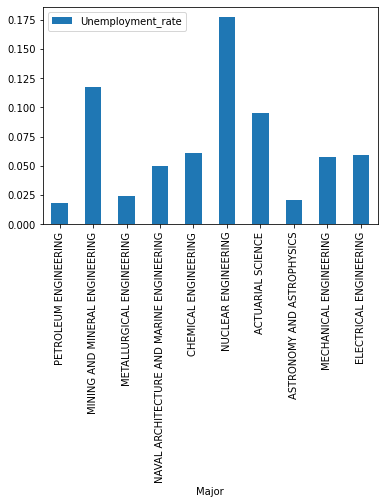

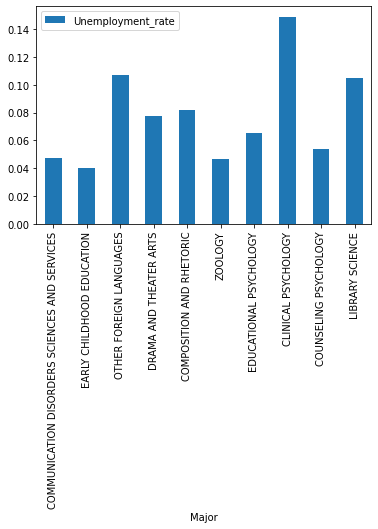

In [5]:
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate')
recent_grads[-10:].plot.bar(x='Major', y='Unemployment_rate')

We can see that among the highest median salaries, the Nuclear Engineering major has the biggest unemployment rate, followed by the Mining and Mineral Engineering major. For the lowest salaries, the Clinical Psychology major has the biggest unemployment rate. Both high and low salary majors have high and low unemployment rates.

We'll now use [box plots](https://en.wikipedia.org/wiki/Box_plot) to see the variation in the 'Unemployment_rate' and in the 'Median' columns.

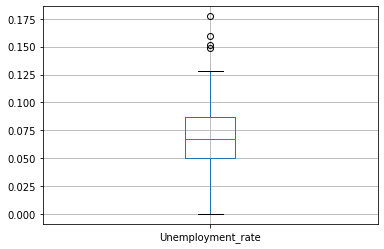

In [6]:
recent_grads[['Unemployment_rate']].boxplot()

The median is about 0.07 and the last quartile goes from about 0.085 to 0.125, while the first quartile goes from 0.05 to 0.05.

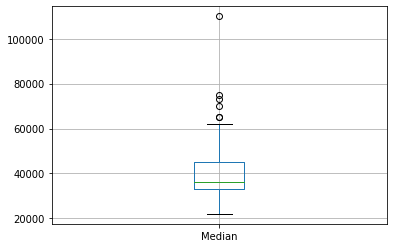

In [7]:
recent_grads[['Median']].boxplot()

The median is for the 'Median' column box plot is right below 40,000, while the last quertile goes from about 45 to 60 thousand.


We'll now start workig with [scatter plots](https://en.wikipedia.org/wiki/Scatter_plot). This kind of plot will help us to visualize any correlation between two varaibles. If the plot is too dense in some areas, we'll also use hexagonal bin plots so we can take the density into consideration.

Text(0, 0.5, 'Median')

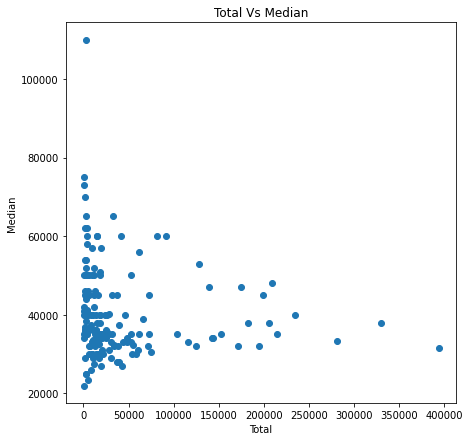

In [8]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(x=recent_grads['Total'], y=recent_grads['Median'])
ax.set_title('Total Vs Median')
ax.set_xlabel('Total')
ax.set_ylabel('Median')

C:\Users\otavi\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\otavi\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\otavi\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\otavi\Anaconda3\lib\site-packages\pandas\plotting\_matpl

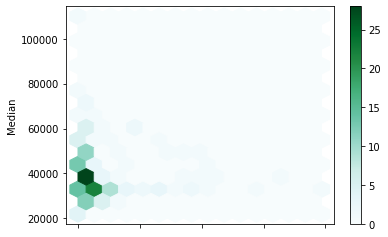

In [9]:
recent_grads.plot.hexbin(x = 'Total', y='Median', gridsize=15);

Text(0, 0.5, 'Unemployment Rate')

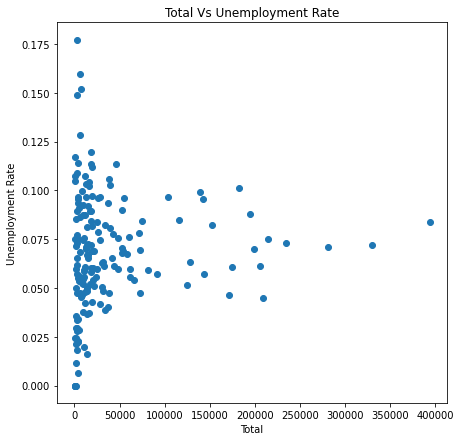

In [10]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(x=recent_grads['Total'], y=recent_grads['Unemployment_rate'])
ax.set_title('Total Vs Unemployment Rate')
ax.set_xlabel('Total')
ax.set_ylabel('Unemployment Rate')

We can see that there's no correlation between the total of students in the major neither with the median salary nor with the unemployment rate.

Text(0, 0.5, 'Median')

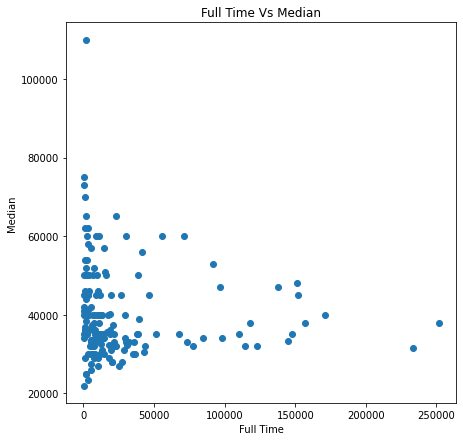

In [11]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(x=recent_grads['Full_time'], y=recent_grads['Median'])
ax.set_title('Full Time Vs Median')
ax.set_xlabel('Full Time')
ax.set_ylabel('Median')

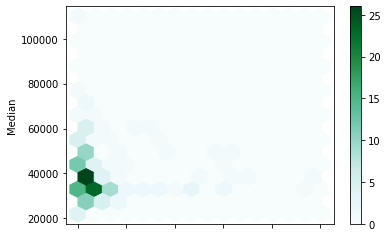

In [12]:
recent_grads.plot.hexbin(x = 'Full_time', y='Median', gridsize=15);

Text(0, 0.5, 'Median')

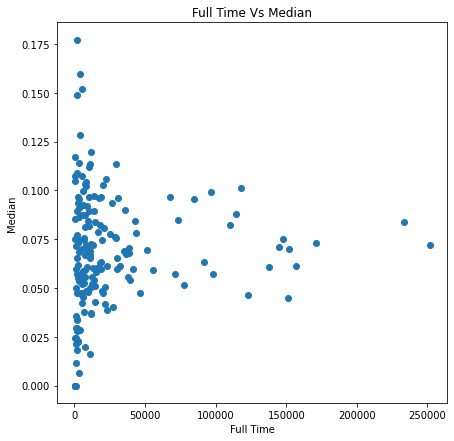

In [13]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(x=recent_grads['Full_time'], y=recent_grads['Unemployment_rate'])
ax.set_title('Full Time Vs Median')
ax.set_xlabel('Full Time')
ax.set_ylabel('Median')

We also can't see no correlation between the amount of graduated with full time job and the median salary or unemployment rate.

Text(0, 0.5, 'Unemployment Rate')

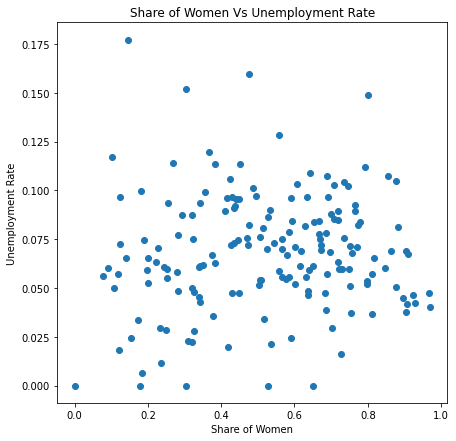

In [14]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(x=recent_grads['ShareWomen'], y=recent_grads['Unemployment_rate'])
ax.set_title('Share of Women Vs Unemployment Rate')
ax.set_xlabel('Share of Women')
ax.set_ylabel('Unemployment Rate')

Now let't see how gender affects the median salary and the unemployment rate.

Text(0, 0.5, 'Median')

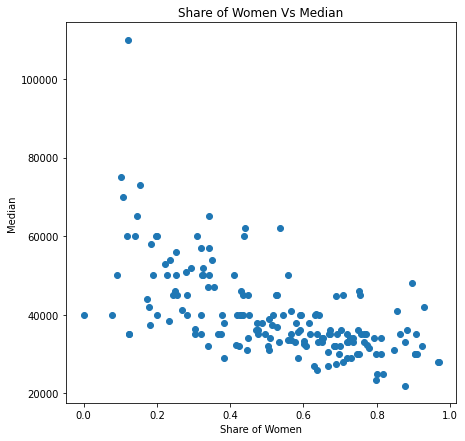

In [15]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(x=recent_grads['ShareWomen'], y=recent_grads['Median'])
ax.set_title('Share of Women Vs Median')
ax.set_xlabel('Share of Women')
ax.set_ylabel('Median')

Text(0, 0.5, 'Median')

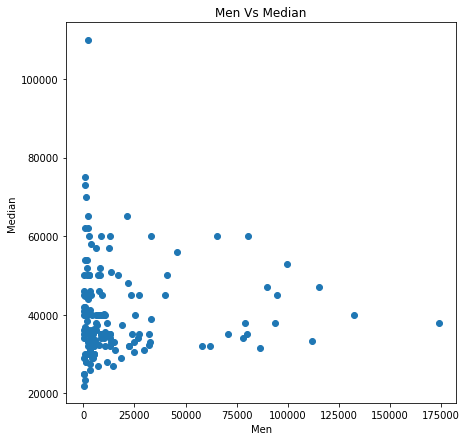

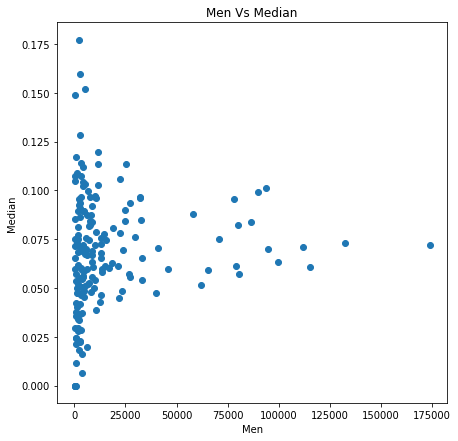

In [16]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(x=recent_grads['Men'], y=recent_grads['Median'])
ax.set_title('Men Vs Median')
ax.set_xlabel('Men')
ax.set_ylabel('Median')

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(x=recent_grads['Men'], y=recent_grads['Unemployment_rate'])
ax.set_title('Men Vs Median')
ax.set_xlabel('Men')
ax.set_ylabel('Median')

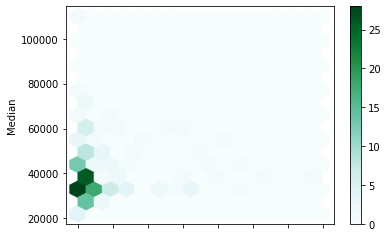

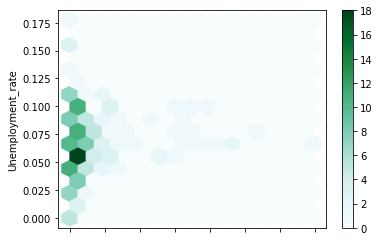

In [17]:
recent_grads.plot.hexbin(x = 'Men', y='Median', gridsize=15);
recent_grads.plot.hexbin(x = 'Men', y='Unemployment_rate', gridsize=15);

Text(0, 0.5, 'Median')

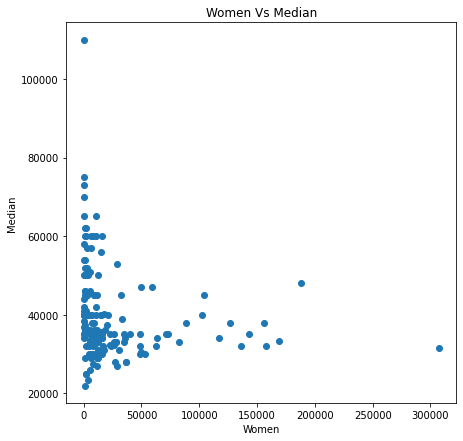

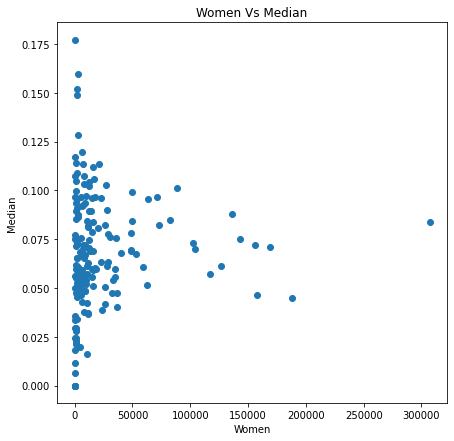

In [18]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(x=recent_grads['Women'], y=recent_grads['Median'])
ax.set_title('Women Vs Median')
ax.set_xlabel('Women')
ax.set_ylabel('Median')

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(x=recent_grads['Women'], y=recent_grads['Unemployment_rate'])
ax.set_title('Women Vs Median')
ax.set_xlabel('Women')
ax.set_ylabel('Median')

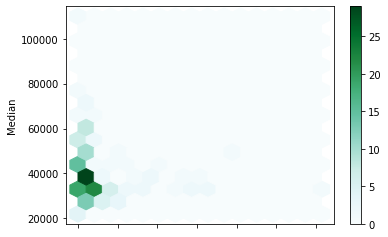

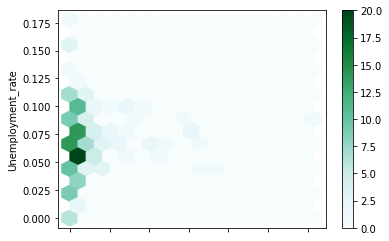

In [19]:
recent_grads.plot.hexbin(x = 'Women', y='Median', gridsize=15);
recent_grads.plot.hexbin(x = 'Women', y='Unemployment_rate', gridsize=15);

All the plots look pretty much the same, showing no correlation, with the except of the 'Share of Women Vs Median' plot that shows a small negative correlation between the share of women and the median salary.

As we are on the gender subject, let's visualize the proportion of men and women in each one of the categories of majors.

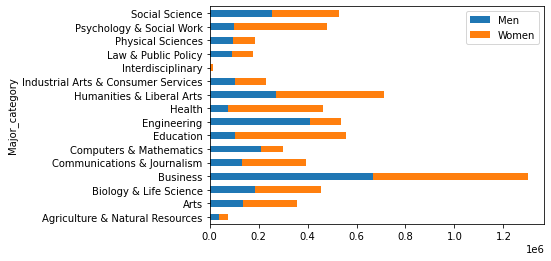

In [20]:
recent_grads.groupby('Major_category')['Men', 'Women'].sum().plot(kind='barh', stacked=True)

Now let's see how many categories have the average share of women per major greater than 0.5.

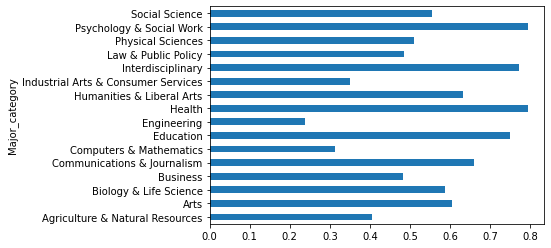

In [21]:
recent_grads.groupby('Major_category').ShareWomen.mean().plot.barh()

10 of the 16 categories have, in average, more women graduate than men graduate.

We'll now look at the share of women in each of the major int he top ten highest and lowest median earnings. Remember that the dataset is ordered by median earnings.

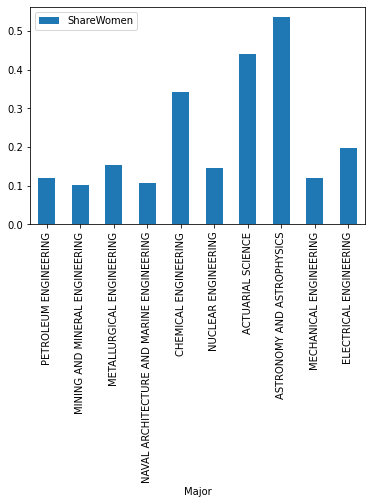

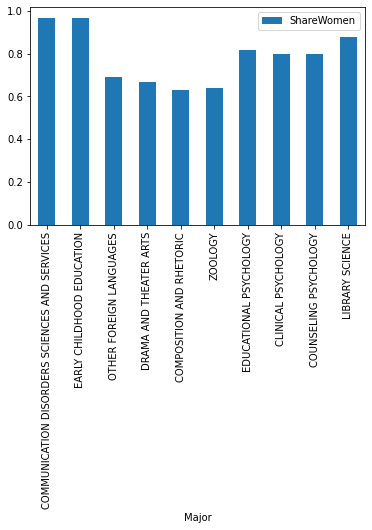

In [22]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen')
recent_grads[-10:].plot.bar(x='Major', y='ShareWomen')

We can see that among the highest median salaries, the Astronomy and Astrophysics major has the biggest share of women, followed by the Actuarial Sciences major. For the lowest salaries all the majors have a big share of women, which supports the 'Share of Women Vs Median' plot that was shown above.

As we approch the end of this project, we'll plot some [histograms](https://en.wikipedia.org/wiki/Histogram) to see the distribution of some of the columns. As the histograms represent data in a pretty straight forward way, there's no need to explain this chart by chart.

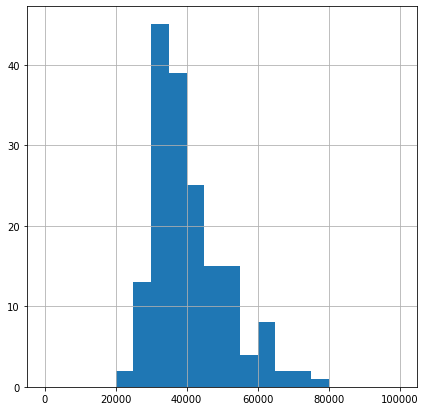

In [23]:
recent_grads['Median'].hist(bins=20, range=(0,100000), figsize=(7,7))

Here we can see that the most common salary range in between 30 and 40 thousand dollars.

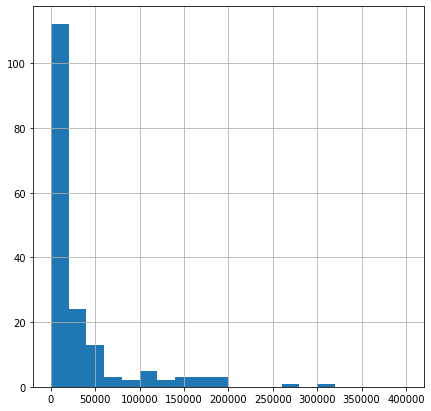

In [24]:
recent_grads['Employed'].hist(bins=20, range=(0,400000), figsize=(7,7))

The most common number of employed graduates range in between 0 and 25 thousand.

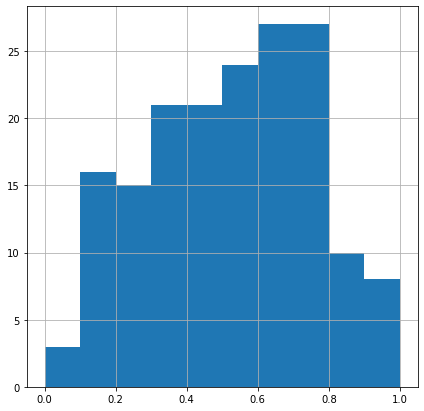

In [25]:
recent_grads['ShareWomen'].hist(bins=10, range=(0,1), figsize=(7,7))

The most common share of women in the majors in this dataset range in between 0.6 and 0.8.

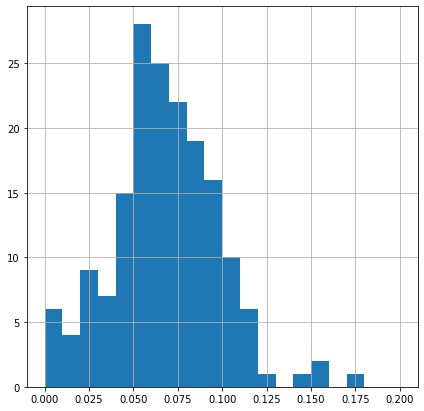

In [26]:
recent_grads['Unemployment_rate'].hist(bins=20, range=(0,0.2), figsize=(7,7))

And the most commons unemployment rates range from 5% to 6,25%.

We'll now use scatter matrices to see potential relationships and distributions between two columns simultaneously. First, we'll use the 'Sample_size' and 'Median' columns. Then we'll plot a scatter matrix for the 'Sample_size', 'Median' and 'Unemployment_rate' columns together.

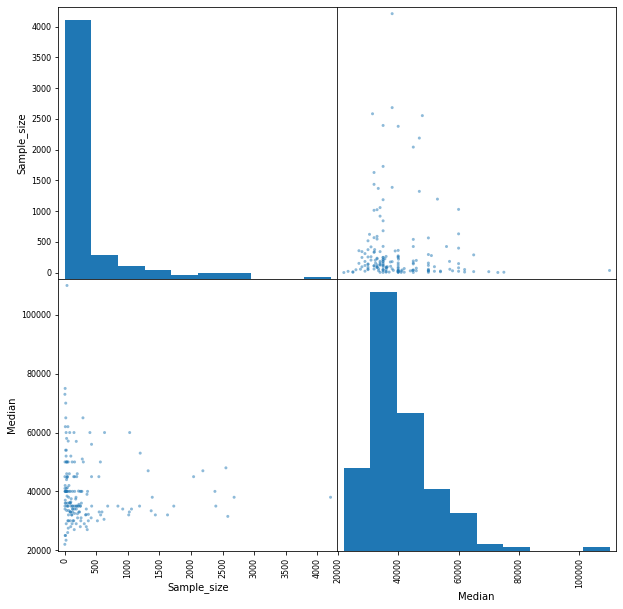

In [27]:
from pandas.plotting import scatter_matrix

scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10));

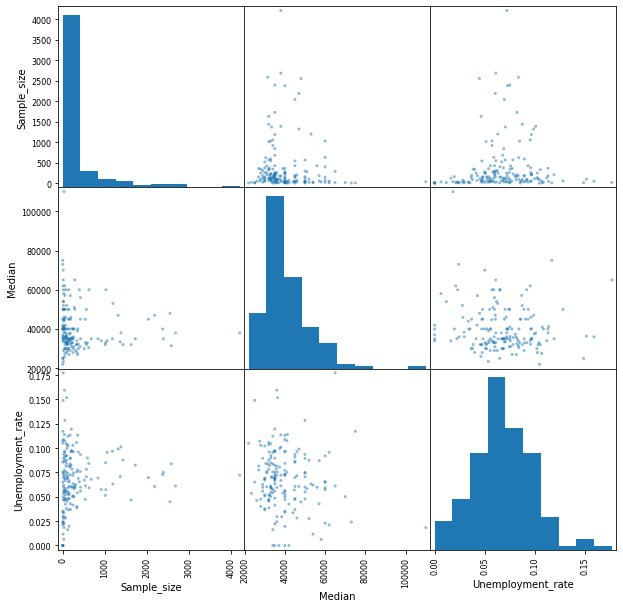

In [28]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10));

We can see the histograms and the scatter plots that show us that there's no correlations between those columns.

# Conclusions

As we reach the end this project, we are able to concluded, among others things, that:

* There's no correlation between the total of graduates in the major and median salary of the graduates;
* There's a small negative correlation between the share of women and the median salary;
* There's no link between the number of full-time employees and median salary;
* Business is the major category with more graduates;
* There more categories of majors with the majority of women than with the majority of men.

I appreciate you reading this all the way to the end. I'm also open to suggestions and ideas for more analysis and projects.